#Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install s3fs

In [4]:
##Reading non-event data
non_event_data=pd.read_csv("s3://telecomcapstoneprojectonkar/non_events_data/000000_0",names=["device_id","gender","age","group_train","phone_brand","device_model"])

In [5]:
app_events_file_list=["s3://telecomcapstoneprojectonkar/app_events_data/000000_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000001_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000002_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000003_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000004_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000005_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000006_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000007_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000008_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000009_0",
                      "s3://telecomcapstoneprojectonkar/app_events_data/000010_0"]

In [6]:
##Reading Event_Data
app_events=pd.DataFrame(columns=["event_id","app_id","is_installed","is_active"])
for file in app_events_file_list:
  temp=pd.read_csv(file,header=None,names=["event_id","app_id","is_installed","is_active"])
  dataframes=[app_events,temp]
  app_events=pd.concat(dataframes)

In [7]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2960967,8557198901083791098,1,1
1,2960967,-1633912854767170738,1,0
2,2960967,628020936226491308,1,0
3,2960967,7318279094145460336,1,0
4,2960967,3358418900419361927,1,0


In [8]:
#Read Event_Data
event_data = pd.read_csv("s3://telecomcapstoneprojectonkar/event_data/000000_0",names=["device_id","gender","age","group_train","event_id","timestamp","longitude","latitude"],encoding="latin-1")
event_data.event_id=event_data.event_id.apply(lambda x : np.nan if x==r"\N" else x)
event_data.timestamp=event_data.timestamp.apply(lambda x : np.nan if x==r"\N" else x)
event_data.longitude=event_data.longitude.apply(lambda x : np.nan if x==r"\N" else x)
event_data.latitude=event_data.latitude.apply(lambda x : np.nan if x==r"\N" else x)


In [9]:
event_data.event_id=event_data.event_id.astype("float")
event_data.longitude=event_data.longitude.astype("float")
event_data.latitude=event_data.latitude.astype("float")

In [10]:
##Label Data
app_labels = pd.read_csv("https://capstone-project-mlc-metadata.s3.amazonaws.com/app_labels_new.txt")

In [11]:
label_category = pd.read_csv("https://capstone-project-mlc-metadata.s3.amazonaws.com/label_categories.csv")

In [12]:
label_data=pd.merge(app_labels,label_category,on=("label_id"))

#EDA

##Checking for Null values

In [13]:
event_data.isnull().sum()

device_id          0
gender             0
age                0
group_train        0
event_id       51335
timestamp      51335
longitude      51335
latitude       51335
dtype: int64

In [14]:
label_data.isnull().sum()

app_id      0
label_id    0
category    0
dtype: int64

In [15]:
non_event_data.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

In [16]:
app_events.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [17]:
len(event_data)

1266933

In [18]:
event_data.shape

(1266933, 8)

In [19]:
non_event_data.shape

(74646, 6)

In [20]:
non_event_data.dtypes

device_id        int64
gender          object
age              int64
group_train     object
phone_brand     object
device_model    object
dtype: object

##Plots
This covers the Sub-tasks given to perform as part of EDA

###Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

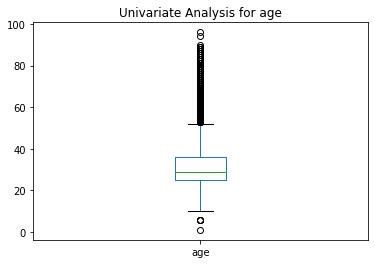

In [21]:
non_event_data["age"].plot(kind="box")
plt.title("Univariate Analysis for age")
plt.show()

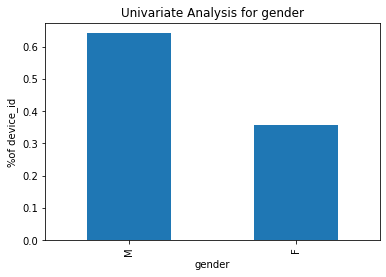

In [22]:
non_event_data["gender"].value_counts(normalize=True).plot(kind="bar")
plt.title("Univariate Analysis for gender")
plt.xlabel("gender")
plt.ylabel("%of device_id")
plt.show()

###Boxplot analysis for gender and age [bivariate].

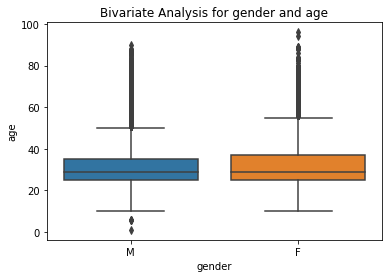

In [23]:
sns.boxplot(x=non_event_data["gender"],y=non_event_data["age"])
plt.title("Bivariate Analysis for gender and age")
plt.show()

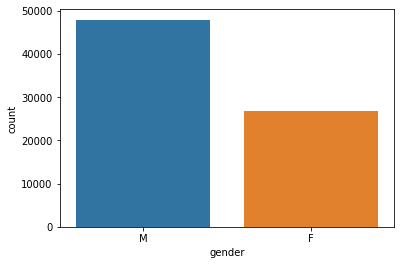

In [24]:
sns.countplot(non_event_data["gender"])
plt.show()

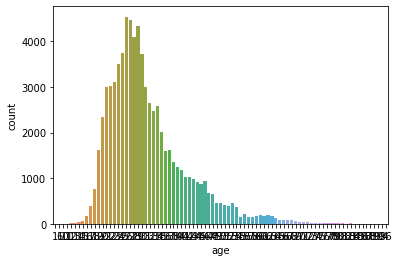

In [25]:
sns.countplot(non_event_data["age"])
plt.show()

###Plot the percentage of the device_ids with and without event data.

In [26]:
event_data['flag']= event_data.apply(lambda x : "Null" if pd.isnull(x['event_id']) else "NotNull", axis = 1)

In [27]:
len(event_data[event_data["flag"]=="Null"])

51335

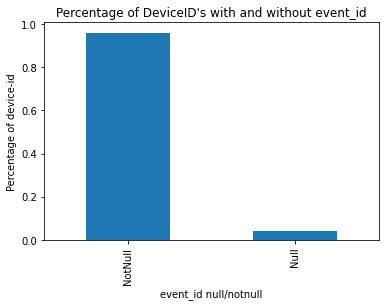

In [28]:
event_data["flag"].value_counts(normalize=True).plot(kind="bar")
plt.title("Percentage of DeviceID's with and without event_id")
plt.xlabel("event_id null/notnull")
plt.ylabel("Percentage of device-id")
plt.show()

###Plot a graph representing the distribution of events over different days of a week. 

In [29]:
event_data["timestamp"] = pd.to_datetime(event_data["timestamp"])

In [30]:
event_data.dtypes

device_id               int64
gender                 object
age                     int64
group_train            object
event_id              float64
timestamp      datetime64[ns]
longitude             float64
latitude              float64
flag                   object
dtype: object

In [31]:
import datetime as dt
event_data["day_of_week"]=event_data["timestamp"].dt.dayofweek

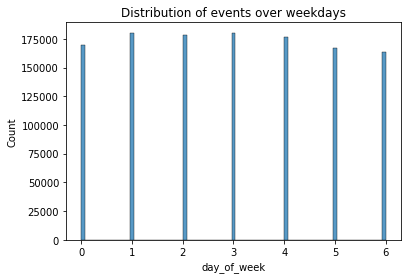

In [32]:
sns.histplot(data=event_data, x = event_data["day_of_week"])
plt.title("Distribution of events over weekdays")
plt.show()

In [33]:
event_data["day_of_week"].value_counts()

1.0    180296
3.0    180041
2.0    178371
4.0    176657
0.0    169381
5.0    166835
6.0    164017
Name: day_of_week, dtype: int64

###Plot a graph representing the distribution of events per hour 

In [34]:
event_data["hour"]=event_data["timestamp"].dt.hour

In [35]:
event_data["timestamp"].dt.week.value_counts()

18.0    1051204
17.0     164394
Name: timestamp, dtype: int64

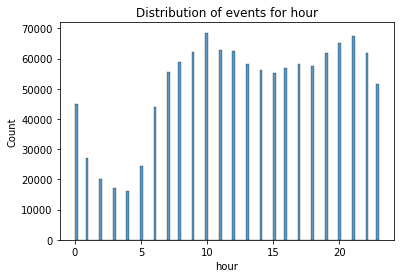

In [36]:
sns.histplot(data=event_data[event_data["timestamp"].dt.week==17], x = event_data["hour"])
plt.title("Distribution of events for hour")
plt.show()


###The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

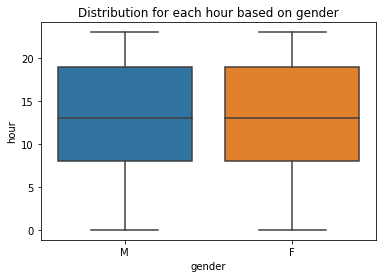

In [37]:
sns.boxplot(data=event_data[event_data["timestamp"].dt.week==17], y = event_data["hour"] , x = event_data["gender"] )
plt.title("Distribution for each hour based on gender")
plt.show()

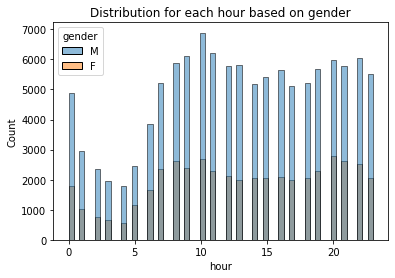

In [38]:
sns.histplot(data=event_data[event_data["timestamp"].dt.week==17], x = event_data['hour'], hue='gender')
plt.title("Distribution for each hour based on gender")
plt.show()

###Is there any difference in the distribution of Events for different Age Groups over different days of the week? 

In [39]:
def age_binning(age):
  if(age<25):
    return "0-24"
  elif((age>24) and (age<33)):
    return "25-32"
  elif((age>32) and (age<46)):
    return "32-45"
  else:
    return "46+"

In [40]:
event_data_week=event_data[event_data["timestamp"].dt.week==18]

In [41]:
event_data_week["day_of_week"].value_counts()

1.0    180296
3.0    180041
2.0    178371
4.0    176657
0.0    169381
5.0    166457
6.0         1
Name: day_of_week, dtype: int64

In [42]:
event_data_week["bin_age"]=event_data_week["age"].apply(age_binning)

In [43]:
df_age=pd.pivot_table(data=event_data_week,index="day_of_week",columns="bin_age",values="event_id",aggfunc="count")

In [44]:
df_age

bin_age,0-24,25-32,32-45,46+
day_of_week,,,,
0.0,27123.0,65877.0,55232.0,21149.0
1.0,26144.0,71487.0,59882.0,22783.0
2.0,27114.0,69098.0,58851.0,23308.0
3.0,26842.0,72543.0,57949.0,22707.0
4.0,26975.0,70270.0,57477.0,21935.0
5.0,26317.0,65176.0,53698.0,21266.0
6.0,NaN,1.0,NaN,NaN


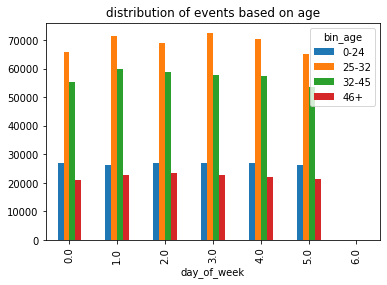

In [45]:
df_age.plot(kind="bar")
plt.title("distribution of events based on age")
plt.show()

###Stacked bar chart for the top 10 mobile brands across male and female consumers.

In [46]:
phone_brands=pd.pivot_table(data=non_event_data,index="phone_brand",columns="gender",values="device_id",aggfunc="count")

In [47]:
phone_brands["total"]=phone_brands["F"]+phone_brands["M"]

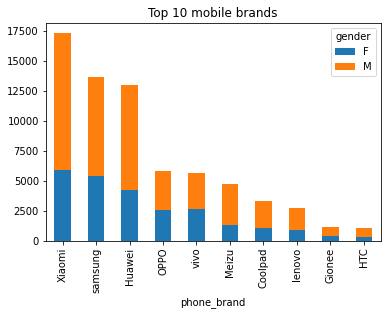

In [48]:
phone_brands.nlargest(10,"total")[["F","M"]].plot(kind="bar",stacked=True)
plt.title("Top 10 mobile brands")
plt.show()

###Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

In [49]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2960967,8557198901083791098,1,1
1,2960967,-1633912854767170738,1,0
2,2960967,628020936226491308,1,0
3,2960967,7318279094145460336,1,0
4,2960967,3358418900419361927,1,0


###List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [50]:
non_event_data.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [51]:
top_10_brands=list(non_event_data.groupby("phone_brand").count().nlargest(10,"age").index)

In [52]:
top_10_brands

['Xiaomi',
 'samsung',
 'Huawei',
 'OPPO',
 'vivo',
 'Meizu',
 'Coolpad',
 'lenovo',
 'Gionee',
 'HTC']

In [53]:
phone_brands=non_event_data[non_event_data["phone_brand"].isin(top_10_brands)]

In [54]:
phone_brands["bin_age"]=phone_brands["age"].apply(age_binning)

In [55]:
phone_brands.head()

,device_id,gender,age,group_train,phone_brand,device_model,bin_age
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,32-45
1,6943568600617760000,M,37,M32+,Xiaomi,xnote,32-45
2,5441349705980020000,M,40,M32+,OPPO,R7s,32-45
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4,32-45
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4,46+


In [56]:
df=pd.pivot_table(data=phone_brands,index="phone_brand",columns="bin_age",values="device_id",aggfunc="count")

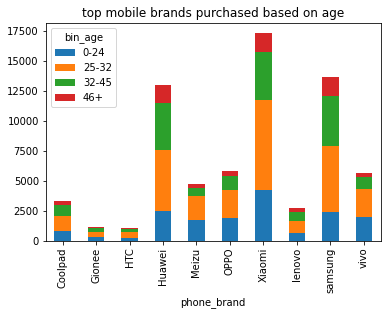

In [57]:
df.plot(kind="bar",stacked=True)
plt.title("top mobile brands purchased based on age")
plt.show()

#Data Preparation

###Scenario 1(All data available) and Scenario 2(Only phone data available)

In [58]:
df=pd.merge(event_data,non_event_data,on="device_id",how="left")

In [60]:
train_test_csv=pd.read_csv("s3://telecomcapstoneprojectonkar/train_test_split.csv",header=0)

In [61]:
train_test_csv.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [62]:
train_test_csv["train_test_flag"].value_counts()

train    58549
test     16096
Name: train_test_flag, dtype: int64

In [63]:
df=pd.merge(df,train_test_csv,on="device_id",how="left")

In [64]:
df.columns

Index(['device_id', 'gender_x', 'age_x', 'group_train_x', 'event_id',
       'timestamp', 'longitude', 'latitude', 'flag', 'day_of_week', 'hour',
       'gender_y', 'age_y', 'group_train_y', 'phone_brand', 'device_model',
       'gender', 'age', 'group', 'train_test_flag'],
      dtype='object')

In [65]:
df.head()

,device_id,gender_x,age_x,group_train_x,event_id,timestamp,longitude,latitude,flag,day_of_week,hour,gender_y,age_y,group_train_y,phone_brand,device_model,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,914064.0,2016-05-02 00:27:06,116.79,33.98,NotNull,0.0,0.0,M,33,M32+,Huawei,è£è€€3C,M,33,M32+,train
1,-7548291590301750000,M,33,M32+,2648633.0,2016-05-05 10:06:12,116.79,33.98,NotNull,3.0,10.0,M,33,M32+,Huawei,è£è€€3C,M,33,M32+,train
2,-7548291590301750000,M,33,M32+,2647728.0,2016-05-01 10:48:34,116.79,33.98,NotNull,6.0,10.0,M,33,M32+,Huawei,è£è€€3C,M,33,M32+,train
3,-7548291590301750000,M,33,M32+,2640893.0,2016-05-04 08:27:36,116.79,33.98,NotNull,2.0,8.0,M,33,M32+,Huawei,è£è€€3C,M,33,M32+,train
4,-7548291590301750000,M,33,M32+,2635715.0,2016-05-03 04:53:10,116.79,33.98,NotNull,1.0,4.0,M,33,M32+,Huawei,è£è€€3C,M,33,M32+,train


In [66]:
df=df.drop(columns=["gender_y","age_y","group_train_y","gender","age","group"],axis=1)

In [67]:
df.rename(columns={"gender_x":"gender","age_x":"age","group_train_x":"group_train"},inplace=True)

In [68]:
df.count()

device_id          1266954
gender             1266954
age                1266954
group_train        1266954
event_id           1215619
timestamp          1215619
longitude          1215619
latitude           1215619
flag               1266954
day_of_week        1215619
hour               1215619
phone_brand        1266954
device_model       1266954
train_test_flag    1266954
dtype: int64

In [69]:
df_all_data=df[~df.event_id.isnull()]

In [70]:
df_only_phone_data=df[df.event_id.isnull()]

###Analysing Category column

In [71]:
label_data=label_data.drop_duplicates()

In [72]:
app_events[app_events.duplicated(["event_id","app_id","is_installed","is_active"])]

,event_id,app_id,is_installed,is_active


In [73]:
label_data[label_data["app_id"]==2441810024319437760]

,app_id,label_id,category
2246,2441810024319437760,256,Securities
2421,2441810024319437760,564,pursue
6818,2441810024319437760,405,Custom label
56812,2441810024319437760,549,Property Industry 1.0
100224,2441810024319437760,548,Industry tag
139731,2441810024319437760,713,Services 1
181276,2441810024319437760,704,Property Industry 2.0
230991,2441810024319437760,731,stock
235244,2441810024319437760,732,A shares
241641,2441810024319437760,783,High risk


In [74]:
label_data[label_data.duplicated(["app_id"])]

,app_id,label_id,category
2208,6058196446775239644,406,unknown
2210,1977658975649789753,406,unknown
2211,8024047519993119192,406,unknown
2212,7098329372864993043,406,unknown
2213,-5309037015500363305,406,unknown
...,...,...,...
459919,-8226070101802882315,973,Table Games
459920,7445307451474472117,973,Table Games
459921,8469490204899884160,981,Family Games
459923,9184022816963385838,981,Family Games


In [75]:
df1=pd.DataFrame(label_data["category"].value_counts())

In [76]:
import re
def remove_digits(string):
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', string)
    pattern=r'[^\x00-\x7F]+'
    new_string = re.sub(pattern, '', new_string)
    pattern ="\."
    new_string = re.sub(pattern, '', new_string)
    return new_string

In [77]:
label_data["category"]=label_data["category"].apply(remove_digits)

In [78]:
label_data["category"].value_counts()

Industry tag            56902
Custom label            53936
Tencent                 49320
game                    48707
Property Industry       47940
                        ...  
Furniture                   1
Browser                     1
game-Gem Elimination        1
psychology                  1
Trust funds                 1
Name: category, Length: 471, dtype: int64

In [79]:
import difflib
from difflib import get_close_matches

In [80]:
def super_category(word):
  seq=[]
  Categories_of_Apps=["Industry","property","finance","games","health","church","Entertainment","Custom label","tencent","Buy","Education"]
  for a in Categories_of_Apps:
    temp = difflib.SequenceMatcher(None,a,word)
    d = temp.ratio()*100
    seq.append(d)
  word1 = Categories_of_Apps[seq.index(max(seq))]
  return word1

In [81]:
label_data["super_category"]=label_data["category"].apply(super_category)

In [82]:
df1=pd.DataFrame(label_data.groupby(["app_id"])["super_category"].apply(pd.Series.mode)).reset_index()

In [83]:
df1.drop_duplicates(subset=["app_id"],keep="first",inplace=True)

In [84]:
df1.drop(columns=["level_1"],inplace=True)

In [85]:
app_label_data = pd.merge(app_events, df1 , on=("app_id"),how="inner")

In [86]:
##is_installed == If the app is installed or not
##is_active==if the app is active or not. Since we want the active apps we will eliminate the rows with is_active==0

app_label_data=app_label_data[app_label_data["is_active"]==1]

In [87]:
app_label_data.groupby("event_id").count().describe()
## below it shows that at an average there are 8 apps active for each event id. For out ease of caluculation we can take top 8 active categories for each event_ids.

,app_id,is_installed,is_active,super_category
count,1.477059e+06,1.477059e+06,1.477059e+06,1.477059e+06
mean,8.620506e+00,8.620506e+00,8.620506e+00,8.620506e+00
std,6.405320e+00,6.405320e+00,6.405320e+00,6.405320e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
50%,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
75%,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
max,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01


In [88]:
app_label_data=app_label_data.groupby("event_id").head(1)

In [89]:
df1 = pd.merge(df_all_data,app_label_data,on=("event_id"),how="inner")

In [90]:
df1.isnull().sum()

device_id          0
gender             0
age                0
group_train        0
event_id           0
timestamp          0
longitude          0
latitude           0
flag               0
day_of_week        0
hour               0
phone_brand        0
device_model       0
train_test_flag    0
app_id             0
is_installed       0
is_active          0
super_category     0
dtype: int64

In [91]:
df1.drop(columns=["flag","app_id","is_installed","is_active","device_model"],inplace=True)

In [92]:
df1.train_test_flag.value_counts()

train    416220
test     139083
Name: train_test_flag, dtype: int64

#*Feature Engineering*

###Considering the events data, you can create a feature called Average Events, which can give you an estimate of how long the users' mobile phones are active.

In [93]:
df1.head()

,device_id,gender,age,group_train,event_id,timestamp,longitude,latitude,day_of_week,hour,phone_brand,train_test_flag,super_category
0,-7548291590301750000,M,33,M32+,1.14187e+06,2016-05-01 10:08:16,116.79,33.98,6.0,10.0,Huawei,train,Industry
1,6943568600617760000,M,37,M32+,1.27982e+06,2016-05-01 11:59:32,0.00,0.00,6.0,11.0,Xiaomi,train,Industry
2,5441349705980020000,M,40,M32+,1.81458e+06,2016-05-02 23:55:47,0.00,0.00,0.0,23.0,OPPO,train,Industry
3,-5393876656119450000,M,33,M32+,650136,2016-05-06 23:01:47,0.00,0.00,4.0,23.0,Xiaomi,train,Education
4,-5393876656119450000,M,33,M32+,2.7913e+06,2016-05-06 22:55:28,0.00,0.00,4.0,22.0,Xiaomi,train,Education


In [94]:
df=pd.DataFrame(event_data.groupby(["device_id"])["event_id"].count())
df.rename(columns={"event_id":"Total_No_events"},inplace=True)
df1=pd.merge(df1,df,on=("device_id"),how="left")

###You can use the information related to the location of the users (latitude and longitude data) to create features representing changes in the latitude and longitude details at different times of the day.

In [95]:
df1=df1[df1["longitude"]>0]
df1=df1[df1["latitude"]>0]

In [96]:
df=pd.DataFrame(df1.groupby(["device_id","longitude","latitude"]).size()).reset_index()
new_df=pd.DataFrame(df.groupby("device_id").size())
new_df.rename(columns={0:"Change_in_LatLong"},inplace=True)
df1=pd.merge(df1,new_df,on=("device_id"),how="left")

In [97]:
df1.head()

,device_id,gender,age,group_train,event_id,timestamp,longitude,latitude,day_of_week,hour,phone_brand,train_test_flag,super_category,Total_No_events,Change_in_LatLong
0,-7548291590301750000,M,33,M32+,1.14187e+06,2016-05-01 10:08:16,116.79,33.98,6.0,10.0,Huawei,train,Industry,292,1
1,4543988487649880000,M,53,M32+,2.47459e+06,2016-05-06 09:30:23,104.25,30.89,4.0,9.0,samsung,train,Education,115,4
2,4543988487649880000,M,53,M32+,2.38575e+06,2016-05-05 04:39:46,104.26,30.88,3.0,4.0,samsung,train,Education,115,4
3,4543988487649880000,M,53,M32+,2.92534e+06,2016-05-04 22:06:33,104.26,30.88,2.0,22.0,samsung,train,Industry,115,4
4,4543988487649880000,M,53,M32+,2.20207e+06,2016-05-05 05:05:48,104.26,30.88,3.0,5.0,samsung,train,Industry,115,4


In [98]:
df1.count()

device_id            199797
gender               199797
age                  199797
group_train          199797
event_id             199797
timestamp            199797
longitude            199797
latitude             199797
day_of_week          199797
hour                 199797
phone_brand          199797
train_test_flag      199797
super_category       199797
Total_No_events      199797
Change_in_LatLong    199797
dtype: int64

In [99]:
df1.train_test_flag.value_counts()

train    150152
test      49645
Name: train_test_flag, dtype: int64

In [100]:
df = df1.groupby(["device_id"]).aggregate({"longitude":['median'],"latitude":['median']}).droplevel(1,axis=1).reset_index()

In [101]:
df.rename(columns={"longitude":"longitude_median","latitude":"latitude_median"},inplace=True)

In [102]:
df.rename(columns={"longitude":"longitude_median","latitude":"latitude_median"},inplace=True)
df1=pd.merge(df1,df,on=("device_id"),how="left")

In [103]:
df1.head()

,device_id,gender,age,group_train,event_id,timestamp,longitude,latitude,day_of_week,hour,phone_brand,train_test_flag,super_category,Total_No_events,Change_in_LatLong,longitude_median,latitude_median
0,-7548291590301750000,M,33,M32+,1.14187e+06,2016-05-01 10:08:16,116.79,33.98,6.0,10.0,Huawei,train,Industry,292,1,116.79,33.98
1,4543988487649880000,M,53,M32+,2.47459e+06,2016-05-06 09:30:23,104.25,30.89,4.0,9.0,samsung,train,Education,115,4,104.26,30.88
2,4543988487649880000,M,53,M32+,2.38575e+06,2016-05-05 04:39:46,104.26,30.88,3.0,4.0,samsung,train,Education,115,4,104.26,30.88
3,4543988487649880000,M,53,M32+,2.92534e+06,2016-05-04 22:06:33,104.26,30.88,2.0,22.0,samsung,train,Industry,115,4,104.26,30.88
4,4543988487649880000,M,53,M32+,2.20207e+06,2016-05-05 05:05:48,104.26,30.88,3.0,5.0,samsung,train,Industry,115,4,104.26,30.88


###Visualising in Map
Sub-Task Advanced Visualization

In [104]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     | 133.1 MB 1.8 MB/s
     |████████████████████████████████| 6.3 MB 2.8 MB/s 
     |████████████████████████████████| 219 kB 39.8 MB/s 
     |████████████████████████████████| 2.8 MB 2.7 MB/s 


In [105]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [106]:
event_data_100000=df1[0:100000]

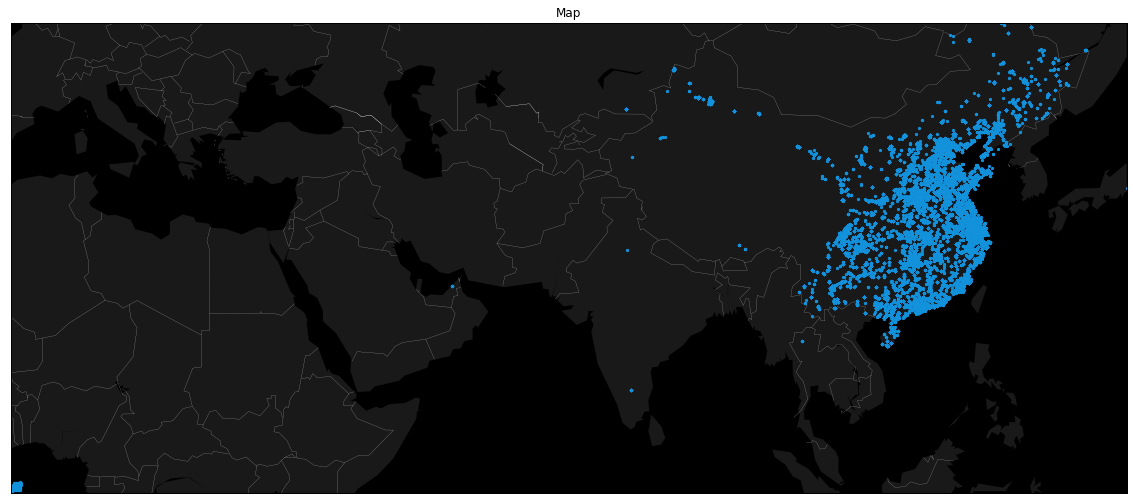

In [107]:
fig = plt.figure(figsize=(20, 50))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=event_data_100000["latitude"].min(),  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=event_data_100000["latitude"].max(), #latitude of upper right hand corner of the desired map domain
             llcrnrlon=event_data_100000["longitude"].min(), #longitude of lower left hand corner of the desired map domain
             urcrnrlon=event_data_100000["longitude"].max(), #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(event_data_100000["longitude"].tolist(), event_data_100000["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("Map")
plt.show()

In [108]:
df1.drop(columns=["event_id","timestamp","latitude","longitude"],inplace=True)

In [109]:
df1=df1.drop_duplicates()

In [110]:
df1.count()

device_id            140838
gender               140838
age                  140838
group_train          140838
day_of_week          140838
hour                 140838
phone_brand          140838
train_test_flag      140838
super_category       140838
Total_No_events      140838
Change_in_LatLong    140838
longitude_median     140838
latitude_median      140838
dtype: int64

In [111]:
df1.train_test_flag.value_counts()

train    105725
test      35113
Name: train_test_flag, dtype: int64

##Clustering
Sub-Task Clustering

In [112]:
arr=df1[["latitude_median","longitude_median"]]

In [113]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
%matplotlib inline

In [114]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(arr)
distances, indices = nbrs.kneighbors(arr)

In [115]:
distances = distances[:,1]

In [116]:
modified_array = np.delete(distances, np.where(distances == 0.))


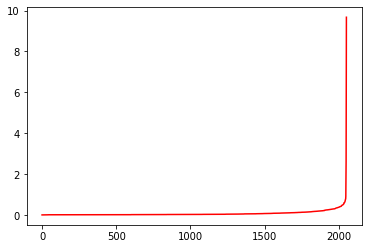

In [117]:
distances = np.sort(modified_array, axis=0)
plt.plot(distances,color="red")
plt.show()


In [118]:
coords=df1[["latitude_median","longitude_median"]]

In [119]:
df1=df1.reset_index()

In [120]:
df1.drop(columns=["index"],inplace=True)

In [121]:
df1.tail()

,device_id,gender,age,group_train,day_of_week,hour,phone_brand,train_test_flag,super_category,Total_No_events,Change_in_LatLong,longitude_median,latitude_median
140833,-537035954505421000,M,32,M25-32,0.0,14.0,samsung,test,finance,14,4,120.72,30.76
140834,-537035954505421000,M,32,M25-32,2.0,7.0,samsung,test,Custom label,14,4,120.72,30.76
140835,-537035954505421000,M,32,M25-32,2.0,20.0,samsung,test,finance,14,4,120.72,30.76
140836,-6464088668920590000,M,24,M0-24,2.0,8.0,Huawei,test,Industry,4,1,1.00,1.00
140837,-6464088668920590000,M,24,M0-24,0.0,0.0,Huawei,test,Industry,4,1,1.00,1.00


In [122]:
kms_per_radian = 6371.0088
epsilon = 0.2/kms_per_radian
minsamples = 100
db = DBSCAN(eps= epsilon, min_samples= minsamples, algorithm = "ball_tree", metric = "haversine").fit(np.radians(coords))

In [123]:
len(db.labels_)

140838

In [124]:
df2=pd.DataFrame(db.labels_)

In [125]:
df2.tail()

,0
140833,-1
140834,-1
140835,-1
140836,1
140837,1


In [126]:
df2.value_counts()

-1      119192
 1        5132
 2        1478
 45        286
 53        274
         ...  
 96        101
 48        101
 89        101
 24        101
 113       100
Length: 118, dtype: int64

In [127]:
df2.rename(columns={0:"cluster_id"},inplace=True)

In [128]:
df1=pd.merge(df1,df2,left_index=True, right_index=True)

In [129]:
df1.head()

,device_id,gender,age,group_train,day_of_week,hour,phone_brand,train_test_flag,super_category,Total_No_events,Change_in_LatLong,longitude_median,latitude_median,cluster_id
0,-7548291590301750000,M,33,M32+,6.0,10.0,Huawei,train,Industry,292,1,116.79,33.98,-1
1,4543988487649880000,M,53,M32+,4.0,9.0,samsung,train,Education,115,4,104.26,30.88,-1
2,4543988487649880000,M,53,M32+,3.0,4.0,samsung,train,Education,115,4,104.26,30.88,-1
3,4543988487649880000,M,53,M32+,2.0,22.0,samsung,train,Industry,115,4,104.26,30.88,-1
4,4543988487649880000,M,53,M32+,3.0,5.0,samsung,train,Industry,115,4,104.26,30.88,-1


In [130]:
df1.train_test_flag.value_counts()

train    105725
test      35113
Name: train_test_flag, dtype: int64

#Model Preparation and Analysis
In the below segment we will now be creating Models using the Scenario 1 Data.
Further we will be evaluating the models based on both scenarios
This will cover the below subtasks


*   Stacking
*   Model Building(HPT)
* Model Evaluation



##Model Analysis
Using Scenario 1(All data available)

###StackCVClassifier

In [131]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from mlxtend.classifier import StackingCVClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [132]:
values=df1.super_category

In [133]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

In [134]:
integer_encoded

array([4, 2, 2, ..., 5, 4, 4])

In [135]:
df1["super_category_en"]=integer_encoded

In [136]:
values=df1.phone_brand
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
df1["phone_brands_en"]=integer_encoded

In [137]:
df1.head()

,device_id,gender,age,group_train,day_of_week,hour,phone_brand,train_test_flag,super_category,Total_No_events,Change_in_LatLong,longitude_median,latitude_median,cluster_id,super_category_en,phone_brands_en
0,-7548291590301750000,M,33,M32+,6.0,10.0,Huawei,train,Industry,292,1,116.79,33.98,-1,4,5
1,4543988487649880000,M,53,M32+,4.0,9.0,samsung,train,Education,115,4,104.26,30.88,-1,2,41
2,4543988487649880000,M,53,M32+,3.0,4.0,samsung,train,Education,115,4,104.26,30.88,-1,2,41
3,4543988487649880000,M,53,M32+,2.0,22.0,samsung,train,Industry,115,4,104.26,30.88,-1,4,41
4,4543988487649880000,M,53,M32+,3.0,5.0,samsung,train,Industry,115,4,104.26,30.88,-1,4,41


In [138]:
df1["train_test_flag"].value_counts()

train    105725
test      35113
Name: train_test_flag, dtype: int64

###Predicting Gender

####Model Creation

In [139]:
df1["gender"].value_counts()

M    104785
F     36053
Name: gender, dtype: int64

In [140]:
df1["gender"]=df1["gender"].apply(lambda x : 0 if x=='F' else 1)

In [141]:
df1["gender"].value_counts()

1    104785
0     36053
Name: gender, dtype: int64

In [142]:
df1_train=df1[df1["train_test_flag"]=="train"]

In [143]:
df1_train["gender"].value_counts()

1    78831
0    26894
Name: gender, dtype: int64

In [144]:
df1_test=df1[df1["train_test_flag"]=="test"]

In [145]:
df1_test["gender"].value_counts()

1    25954
0     9159
Name: gender, dtype: int64

In [146]:
y_train=df1_train["gender"]
y_test=df1_test["gender"]

In [147]:
x_train=df1_train.drop(columns=["gender","age","group_train","super_category","train_test_flag","device_id","phone_brand"])
x_test=df1_test.drop(columns=["gender","age","group_train","super_category","train_test_flag","device_id","phone_brand"])

In [148]:
x_train.columns

Index(['day_of_week', 'hour', 'Total_No_events', 'Change_in_LatLong',
       'longitude_median', 'latitude_median', 'cluster_id',
       'super_category_en', 'phone_brands_en'],
      dtype='object')

In [149]:
from sklearn.preprocessing import StandardScaler
x_train["Total_No_events"]=StandardScaler().fit_transform(x_train[["Total_No_events"]])

In [150]:
x_train["Change_in_LatLong"]=StandardScaler().fit_transform(x_train[["Change_in_LatLong"]])
x_train["longitude_median"]=StandardScaler().fit_transform(x_train[["longitude_median"]])
x_train["latitude_median"]=StandardScaler().fit_transform(x_train[["latitude_median"]])

In [151]:
x_test["Total_No_events"]=StandardScaler().fit_transform(x_test[["Total_No_events"]])
x_test["Change_in_LatLong"]=StandardScaler().fit_transform(x_test[["Change_in_LatLong"]])
x_test["longitude_median"]=StandardScaler().fit_transform(x_test[["longitude_median"]])
x_test["latitude_median"]=StandardScaler().fit_transform(x_test[["latitude_median"]])

In [152]:
x_train

,day_of_week,hour,Total_No_events,Change_in_LatLong,longitude_median,latitude_median,cluster_id,super_category_en,phone_brands_en
0,6.0,10.0,0.127017,-0.651033,0.269381,0.419892,-1,4,5
1,4.0,9.0,-0.399326,-0.286586,-0.299598,0.040792,-1,2,41
2,3.0,4.0,-0.399326,-0.286586,-0.299598,0.040792,-1,2,41
3,2.0,22.0,-0.399326,-0.286586,-0.299598,0.040792,-1,4,41
4,3.0,5.0,-0.399326,-0.286586,-0.299598,0.040792,-1,4,41
...,...,...,...,...,...,...,...,...,...
105720,2.0,0.0,-0.699668,-0.529551,-0.311404,0.020003,-1,4,5
105721,4.0,18.0,-0.699668,-0.529551,-0.311404,0.020003,-1,2,5
105722,6.0,10.0,-0.699668,-0.529551,-0.311404,0.020003,-1,4,5
105723,1.0,22.0,-0.699668,-0.529551,-0.311404,0.020003,-1,2,5


In [153]:
x_train=x_train.values
y_train=y_train.values

In [154]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

####Hyperparameter Tuning

In [155]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(random_state=1) # just for demo have taken 10 trees 
xgb = XGBClassifier()

stacking_Classifier = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [156]:
params = {'randomforestclassifier__max_depth': [2,5, 10], 'randomforestclassifier__n_estimators': [5,10,15]}

In [157]:
grid = GridSearchCV(estimator=stacking_Classifier, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

In [158]:
for clf, label in zip([clf1, clf2, stacking_Classifier], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.01) [lr]
Accuracy: 0.58 (+/- 0.02) [Random Forest]
Accuracy: 0.58 (+/- 0.02) [StackingClassifier]


In [159]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingCVClassifier(classifiers=[LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='auto',
                                                                            n_jobs=None,
                                                                            penalty='l2',
                                                 

In [160]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

In [161]:
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))


0.743 +/- 0.00 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 5}
0.735 +/- 0.01 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 10}
0.742 +/- 0.00 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 15}
0.723 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 5}
0.710 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 10}
0.712 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 15}
0.681 +/- 0.00 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 5}
0.668 +/- 0.01 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 10}
0.658 +/- 0.01 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 15}


In [162]:
stacking_gender=stacking_Classifier.fit(x_train,y_train)

In [163]:
best_model_gender=grid.best_estimator_

In [164]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


####Model - Best Estimator Evaluation

In [165]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_model_gender, open(filename, 'wb'))

In [166]:
y_pred=best_model_gender.predict(x_test)

In [167]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [168]:
y_probabilites=best_model_gender.predict_proba(x_test)

In [169]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [170]:
y_probabilites[:, 1]

array([0.6939397 , 0.6939397 , 0.6939397 , ..., 0.6800128 , 0.73451555,
       0.73255736], dtype=float32)

In [171]:
ks_df = pd.DataFrame(y_test)
ks_df["prob"]=y_probabilites[:, 1]
ks_df.rename(columns={"gender":"target"},inplace=True)

In [172]:
ks_df.count

<bound method DataFrame.count of         target      prob
105725       0  0.693940
105726       0  0.693940
105727       0  0.693940
105728       0  0.759146
105729       0  0.759146
...        ...       ...
140833       1  0.707394
140834       1  0.798099
140835       1  0.680013
140836       1  0.734516
140837       1  0.732557

[35113 rows x 2 columns]>

In [173]:

ks_df=ks_df.drop_duplicates()

In [174]:
!pip install colorama

In [175]:
mydf=ks(ks_df,"target","prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.883939  0.998976      45         14     12.47%         6.11%   
2       0.855243  0.883297      34         24      9.42%        10.48%   
3       0.772271  0.853433      38         22     10.53%         9.61%   
4       0.738865  0.769107      33         25      9.14%        10.92%   
5       0.711800  0.738796      33         26      9.14%        11.35%   
6       0.696629  0.710791      33         27      9.14%        11.79%   
7       0.677840  0.696565      30         29      8.31%        12.66%   
8       0.655141  0.676957      32         27      8.86%        11.79%   
9       0.539342  0.654702      38         21     10.53%         9.17%   
10      0.006617  0.514762      45         14     12.47%         6.11%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             12.47% 

In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
roc=roc_curve(y_test,y_pred)
auc_gender=auc(sorted(y_test),sorted(y_pred))

In [177]:
print("\t\t\tModel Evaluation for scenario 1 (All data Present)\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
print("\n\nRoc Curve :",roc)
print("\n\nauc :",auc_gender)


			Model Evaluation for scenario 1 (All data Present)

confusion matrix
 [[  264  8895]
 [  901 25053]]


Accuracy : 0.7210150086862416


Classification_Report: 

               precision    recall  f1-score   support

           0       0.23      0.03      0.05      9159
           1       0.74      0.97      0.84     25954

    accuracy                           0.72     35113
   macro avg       0.48      0.50      0.44     35113
weighted avg       0.60      0.72      0.63     35113



Roc Curve : (array([0.        , 0.97117589, 1.        ]), array([0.        , 0.96528473, 1.        ]), array([2, 1, 0]))


auc : 1.0


In [178]:
##apply KS statistic
y_pred=[1 if x >0.838421 else 0 for x in y_probabilites[:, 1]]

In [179]:
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
roc=roc_curve(y_test,y_pred)
auc_gender=auc(sorted(y_test),sorted(y_pred))

In [180]:
print("\t\t\tModel Evaluation for scenario 1 (All data Present) KS STATISTIC\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
print("\n\nRoc Curve :",roc)
print("\n\nauc :",auc_gender)

			Model Evaluation for scenario 1 (All data Present) KS STATISTIC

confusion matrix
 [[ 8275   884]
 [21445  4509]]


Accuracy : 0.3640816791501723


Classification_Report: 

               precision    recall  f1-score   support

           0       0.28      0.90      0.43      9159
           1       0.84      0.17      0.29     25954

    accuracy                           0.36     35113
   macro avg       0.56      0.54      0.36     35113
weighted avg       0.69      0.36      0.32     35113



Roc Curve : (array([0.        , 0.09651709, 1.        ]), array([0.        , 0.17373045, 1.        ]), array([2, 1, 0]))


auc : 0.0


###Predicting Age
Using Regression algorithm

####Model Creation

In [181]:
y_train=df1_train["age"]
y_test=df1_test["age"]

In [182]:
x_train=df1_train.drop(columns=["gender","age","group_train","super_category","train_test_flag","device_id","phone_brand"])
x_test=df1_test.drop(columns=["gender","age","group_train","super_category","train_test_flag","device_id","phone_brand"])

In [183]:
x_train["Total_No_events"]=StandardScaler().fit_transform(x_train[["Total_No_events"]])
x_train["Change_in_LatLong"]=StandardScaler().fit_transform(x_train[["Change_in_LatLong"]])
x_train["longitude_median"]=StandardScaler().fit_transform(x_train[["longitude_median"]])
x_train["latitude_median"]=StandardScaler().fit_transform(x_train[["latitude_median"]])

In [184]:
x_test["Total_No_events"]=StandardScaler().fit_transform(x_test[["Total_No_events"]])
x_test["Change_in_LatLong"]=StandardScaler().fit_transform(x_test[["Change_in_LatLong"]])
x_test["longitude_median"]=StandardScaler().fit_transform(x_test[["longitude_median"]])
x_test["latitude_median"]=StandardScaler().fit_transform(x_test[["latitude_median"]])

####Hypermeter Tuning

In [185]:
params_regressor = {'randomforestregressor__max_depth': [5, 10], 'randomforestregressor__n_estimators': [5,10,15],"randomforestregressor__max_features" : ["auto", "sqrt", "log2"]}

In [186]:
x_train=x_train.values
y_train=y_train.values

In [187]:
clf1 = LinearRegression()
clf2 = RandomForestRegressor(random_state=1, n_estimators=10) # just for demo have taken 10 trees 
xgb = XGBRegressor()

stacking_regressor = StackingCVRegressor(regressors=[clf1,clf2],meta_regressor=xgb,cv=3)

In [188]:
for clf, label in zip([clf1, clf2, stacking_regressor], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.02 (+/- 0.01) [lr]
Accuracy: -0.24 (+/- 0.03) [Random Forest]
[15:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: -0.25 (+/- 0.03) [StackingClassifier]


In [189]:
grid = GridSearchCV(estimator=stacking_regressor, 
                    param_grid=params_regressor, 
                    cv=5,
                    refit=True)

In [190]:
stacking_age=stacking_regressor.fit(x_train,y_train)

[15:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [191]:
grid.fit(x_train,y_train)

[15:16:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingCVRegressor(cv=3,
                                           meta_regressor=XGBRegressor(base_score=0.5,
                                                                       booster='gbtree',
                                                                       colsample_bylevel=1,
                                                                       colsample_bynode=1,
                                                                       colsample_bytree=1,
                                                                       gamma=0,
                                                                       importance_type='gain',
                                                                       learning_rate=0.1,
                                                                       max_delta_step=0,
                                                                       max_depth=3,
                           

In [192]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

-0.068 +/- 0.01 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 5}
-0.080 +/- 0.02 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 10}
-0.069 +/- 0.02 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 15}
-0.048 +/- 0.01 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 5}
-0.048 +/- 0.02 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 10}
-0.055 +/- 0.02 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 15}
-0.052 +/- 0.02 {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'log2', 'randomforestregressor_

####Model - Best Estimator Evaluation

In [193]:
best_model_age=grid.best_estimator_

In [194]:
y_pred=best_model_age.predict(x_test)

In [195]:
filename = 'finalized_model_age.sav'
pickle.dump(best_model_age, open(filename, 'wb'))

In [196]:

y_pred

array([32.26854 , 32.34313 , 32.20648 , ..., 32.930786, 34.442814,
       33.92132 ], dtype=float32)

In [197]:
from sklearn.metrics import r2_score,mean_squared_error
accuracy=r2_score(y_test, y_pred)
rmse=mean_squared_error(y_test,y_pred)

In [198]:
print("\t\t\tModel Evaluation for scenario 1 (All data Present)\n")
print("r2_score:",accuracy)
print("\n\rmse :",rmse)

			Model Evaluation for scenario 1 (All data Present)

r2_score: -0.03542143021611843

mse : 101.15538747189744


In [199]:
df_age=pd.DataFrame(y_test)
df_age["pred"]=y_pred

In [200]:
df_age["perc"]=((df_age["age"]-df_age["pred"])/df_age["age"])*100

In [201]:
##percentage_population_distribution 
df_age[df_age["perc"].between(-25,25)].count()["perc"]/df_age.count()

age     0.611369
pred    0.611369
perc    0.611369
dtype: float64

##Model Analysis
Using Scenario2(Only phone data available)

###Data Preparation

In [202]:
df_only_phone_data.head()

,device_id,gender,age,group_train,...,hour,phone_brand,device_model,train_test_flag
1215616,398514470209561000,M,68,M32+,...,NaN,Huawei,è£è€€ç•…çŽ©4X,train
1215617,-3073918292047050000,M,27,M25-32,...,NaN,Huawei,è£è€€ç•…çŽ©4C,train
1215618,5805880616488060000,M,39,M32+,...,NaN,lshi,è¶…çº§æ‰‹æœº1,train
1215619,-2403560729305410000,M,25,M25-32,...,NaN,nibilu,ç«æ˜Ÿä¸€å·,train
1215620,-1889893391998300000,M,22,M0-24,...,NaN,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,train


In [203]:
df_only_phone_data.drop(columns=["event_id","timestamp","longitude","latitude","flag","day_of_week","hour","group_train"],inplace=True)

In [204]:
df_only_phone_data.head()

,device_id,gender,age,phone_brand,device_model,train_test_flag
1215616,398514470209561000,M,68,Huawei,è£è€€ç•…çŽ©4X,train
1215617,-3073918292047050000,M,27,Huawei,è£è€€ç•…çŽ©4C,train
1215618,5805880616488060000,M,39,lshi,è¶…çº§æ‰‹æœº1,train
1215619,-2403560729305410000,M,25,nibilu,ç«æ˜Ÿä¸€å·,train
1215620,-1889893391998300000,M,22,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,train


In [205]:
import re
def strip_character(word):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', word)

df_only_phone_data['device_model'] = df_only_phone_data['device_model'].apply(strip_character)


In [206]:
df_only_phone_data=df_only_phone_data[~(df_only_phone_data["device_model"]=='')]

In [207]:
values=df_only_phone_data["phone_brand"]

In [208]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

In [209]:
df_only_phone_data["phone_brand_en"]=integer_encoded

In [210]:
values=df_only_phone_data["device_model"]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
df_only_phone_data["device_model_en"]=integer_encoded

In [211]:
df_only_phone_data.drop(columns=["phone_brand","device_model","device_id"],inplace=True)

In [212]:
df_only_phone_data=df_only_phone_data.drop_duplicates()

In [213]:
df_only_phone_data.head()

,gender,age,train_test_flag,phone_brand_en,device_model_en
1215616,M,68,train,9,35
1215617,M,27,train,9,34
1215618,M,39,train,62,10
1215620,M,22,train,9,29
1215621,F,18,train,22,863


In [214]:
df_only_phone_data.count()

gender             21976
age                21976
train_test_flag    21976
phone_brand_en     21976
device_model_en    21976
dtype: int64

In [215]:
df_only_phone_data["gender"]=df_only_phone_data["gender"].apply(lambda x : 0 if x=='F' else 1)

###Predicting Gender and Evaluation

In [216]:
df_only_phone_data_train=df_only_phone_data[df_only_phone_data["train_test_flag"]=="train"]
df_only_phone_data_test=df_only_phone_data[df_only_phone_data["train_test_flag"]=="test"]

In [217]:
y_train=df_only_phone_data_train["gender"]
y_test=df_only_phone_data_test["gender"]

In [218]:
x_train=df_only_phone_data_train[["phone_brand_en","device_model_en"]]
x_test=df_only_phone_data_test[["phone_brand_en","device_model_en"]]

In [219]:
x_train=x_train.values
y_train=y_train.values

In [220]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(random_state=1, n_estimators=10) # just for demo have taken 10 trees 
xgb = XGBClassifier()

stacking_Classifier_2 = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [221]:
for clf, label in zip([clf1, clf2, stacking_Classifier_2], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.01) [lr]
Accuracy: 0.51 (+/- 0.01) [Random Forest]
Accuracy: 0.51 (+/- 0.02) [StackingClassifier]


In [222]:
stacking_gender_2=stacking_Classifier.fit(x_train,y_train)

In [223]:
y_pred=stacking_gender_2.predict(x_test)

In [224]:
y_probabilites=stacking_gender.predict_proba(x_test)

In [225]:
ks_df = pd.DataFrame(y_test)
ks_df["prob"]=y_probabilites[:, 1]
ks_df.rename(columns={"gender":"target"},inplace=True)
ks_df=ks_df.drop_duplicates()
mydf=ks(ks_df,"target","prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.670114  0.755787      67         38     11.59%         8.03%   
2       0.642534  0.668773      66         39     11.42%         8.25%   
3       0.620846  0.642225      62         43     10.73%         9.09%   
4       0.609276  0.620525      62         43     10.73%         9.09%   
5       0.597699  0.609112      51         54      8.82%        11.42%   
6       0.585593  0.597673      54         50      9.34%        10.57%   
7       0.574407  0.585389      54         52      9.34%        10.99%   
8       0.561030  0.574180      54         51      9.34%        10.78%   
9       0.536944  0.560969      55         50      9.52%        10.57%   
10      0.375226  0.536849      53         53      9.17%        11.21%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             11.59

In [226]:
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
roc=roc_curve(y_test,y_pred)
auc_gender=auc(sorted(y_test),sorted(y_pred))

In [227]:
print("\t\t\tModel Evaluation for scenario 1 (All data Present)\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
print("\n\nRoc Curve :",roc)
print("\n\nauc :",auc_gender)

			Model Evaluation for scenario 1 (All data Present)

confusion matrix
 [[  67 2402]
 [  95 3661]]


Accuracy : 0.5988755020080321


Classification_Report: 

               precision    recall  f1-score   support

           0       0.41      0.03      0.05      2469
           1       0.60      0.97      0.75      3756

    accuracy                           0.60      6225
   macro avg       0.51      0.50      0.40      6225
weighted avg       0.53      0.60      0.47      6225



Roc Curve : (array([0.        , 0.97286351, 1.        ]), array([0.        , 0.97470714, 1.        ]), array([2, 1, 0]))


auc : 1.0


###Predicting age and Evaluation

In [228]:
y_train=df_only_phone_data_train["age"]
y_test=df_only_phone_data_test["age"]

In [229]:
x_train=df_only_phone_data_train[["phone_brand_en","device_model_en"]]
x_test=df_only_phone_data_test[["phone_brand_en","device_model_en"]]

In [230]:
x_train=x_train.values
y_train=y_train.values

In [231]:
clf1 = LinearRegression()
clf2 = RandomForestRegressor(random_state=1, n_estimators=10) # just for demo have taken 10 trees 
xgb = XGBRegressor()

stacking_2 = StackingCVRegressor(regressors=[clf1,clf2],meta_regressor=xgb,cv=3)

In [232]:
for clf, label in zip([clf1, clf2, stacking_2], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: -0.01 (+/- 0.01) [lr]
Accuracy: -0.16 (+/- 0.16) [Random Forest]
[15:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: -0.02 (+/- 0.04) [StackingClassifier]


In [233]:
stacking_gender_2=stacking_2.fit(x_train,y_train)

[15:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [234]:
y_pred=stacking_gender_2.predict(x_test)

In [235]:
y_pred

array([31.199825, 31.717607, 37.346947, ..., 30.658606, 33.393837,
       33.3597  ], dtype=float32)

In [236]:
accuracy=r2_score(y_test, y_pred)
rmse=mean_squared_error(y_test,y_pred)
print("\t\t\tModel Evaluation for scenario 2 (Only Phone data Present)\n")
print("r2_score:",accuracy)
print("\n\rmse :",rmse)

			Model Evaluation for scenario 2 (Only Phone data Present)

r2_score: 0.008580290427448345

mse : 119.24573396624116


In [237]:
df_age=pd.DataFrame(y_test)
df_age["pred"]=y_pred

In [238]:
df_age["perc"]=((df_age["age"]-df_age["pred"])/df_age["age"])*100

In [239]:
##percentage_population_distribution 
df_age[df_age["perc"].between(-25,25)].count()["perc"]/df_age.count()

age     0.51245
pred    0.51245
perc    0.51245
dtype: float64